## Variance explained by PCA's - 2021 Fall Q3

In [3]:
import numpy as np

# Given S matrix from Singular Value Decomposition
S = np.array([
    [13.5, 0, 0, 0, 0, 0],
    [0, 7.6, 0, 0, 0, 0 ],
    [0, 0, 6.5, 0, 0, 0],
    [0, 0, 0, 5.8, 0, 0],
    [0, 0, 0, 0, 3.5, 0],
    [0, 0, 0, 0, 0, 2.0]
])

# Calculate total variance and cumulative variance explained
total_variance = np.sum(S**2)
variance_explained = np.cumsum(S.diagonal()**2) / total_variance

# Print statements to decide which option is correct
print("Variance explained by the first principal component:", variance_explained[0])
print("Variance explained by the first two principal components:", variance_explained[1])
print("Variance explained by the first three principal components:", variance_explained[2])
print("Variance explained by the first four principal components:", variance_explained[3])
print("Variance explained by the last four principal components:", 1 - variance_explained[0])
print("Variance explained by the last principal component:", variance_explained[3] - variance_explained[2])
print("Variance explained by the last three principal components:", variance_explained[3] - variance_explained[0])
print("Variance explained by the last two principal components:", variance_explained[3] - variance_explained[1])

# Compare with options
# A. The variance explained by the first two principal components is greater than 0.815
# B. The variance explained by the first principal component is greater than 0.51
# C. The variance explained by the last four principal components is less than 0.56
# D. The variance explained by the first three principal components is less than 0.9

# # For each option, check if the condition is met
# is_A_true = variance_explained[1] > 0.815
# is_B_true = variance_explained[0] > 0.51
# is_C_true = (1 - variance_explained[0]) < 0.56
# is_D_true = variance_explained[2] < 0.9

# print("Is Option A true?", is_A_true)
# print("Is Option B true?", is_B_true)
# print("Is Option C true?", is_C_true)
# print("Is Option D true?", is_D_true)


Variance explained by the first principal component: 0.5486978774650008
Variance explained by the first two principal components: 0.7225952130061719
Variance explained by the first three principal components: 0.8497967785639019
Variance explained by the first four principal components: 0.9510763209393346
Variance explained by the last four principal components: 0.45130212253499924
Variance explained by the last principal component: 0.10127954237543269
Variance explained by the last three principal components: 0.4023784434743338
Variance explained by the last two principal components: 0.22848110793316267


## Average Relative Density Calculation - 2019 Fall Q4

In [5]:
import numpy as np

# Distance matrix for the 10 observations
distance_matrix = np.array([
    [0.0, 2.0, 5.7, 0.9, 2.9, 1.8, 2.7, 3.7, 5.3, 5.1],
    [2.0, 0.0, 5.6, 2.4, 2.5, 3.0, 3.5, 4.3, 6.0, 6.2],
    [5.7, 5.6, 0.0, 5.0, 5.1, 4.0, 3.3, 5.4, 1.2, 1.8],
    [0.9, 2.4, 5.0, 0.0, 2.7, 2.1, 2.2, 3.5, 4.6, 4.4],
    [2.9, 2.5, 5.1, 2.7, 0.0, 3.5, 3.7, 4.0, 5.8, 5.7],
    [1.8, 3.0, 4.0, 2.1, 3.5, 0.0, 1.7, 5.3, 3.8, 3.7],
    [2.7, 3.5, 3.3, 2.2, 3.7, 1.7, 0.0, 4.2, 3.1, 3.2],
    [3.7, 4.3, 5.4, 3.5, 4.0, 5.3, 4.2, 0.0, 5.5, 6.0],
    [5.3, 6.0, 1.2, 4.6, 5.8, 3.8, 3.1, 5.5, 0.0, 2.1],
    [5.1, 6.2, 1.8, 4.4, 5.7, 3.7, 3.2, 6.0, 2.1, 0.0]
])

# Index for observation o7
index_o7 = 6
# Number of nearest neighbors
K = 3

# Exclude o7 from the neighbors
neighbors_o7 = np.argsort(distance_matrix[index_o7])[1:K+1]

# Calculate KNN density for o7
knn_density_o7 = 1 / (1/K * np.sum(distance_matrix[index_o7][neighbors_o7]))

# Calculate KNN density for each neighbor
knn_density_neighbors = [
    1 / (1/K * np.sum(np.sort(distance_matrix[n])[1:K+1]))
    for n in neighbors_o7
]

# Average KNN density for the neighbors
avg_knn_density_neighbors = np.mean(knn_density_neighbors)

# Compute ARD for o7
ard_o7 = knn_density_o7 / avg_knn_density_neighbors

ard_o7


0.7788045704921018

## Error Rate - Leave one out cross validation - KNN

In [9]:
import numpy as np

# Distance matrix for the 10 observations
distances = np.array([
    [0.0, 2.0, 5.7, 0.9, 2.9, 1.8, 2.7, 3.7, 5.3, 5.1],
    [2.0, 0.0, 5.6, 2.4, 2.5, 3.0, 3.5, 4.3, 6.0, 6.2],
    [5.7, 5.6, 0.0, 5.0, 5.1, 4.0, 3.3, 5.4, 1.2, 1.8],
    [0.9, 2.4, 5.0, 0.0, 2.7, 2.1, 2.2, 3.5, 4.6, 4.4],
    [2.9, 2.5, 5.1, 2.7, 0.0, 3.5, 3.7, 4.0, 5.8, 5.7],
    [1.8, 3.0, 4.0, 2.1, 3.5, 0.0, 1.7, 5.3, 3.8, 3.7],
    [2.7, 3.5, 3.3, 2.2, 3.7, 1.7, 0.0, 4.2, 3.1, 3.2],
    [3.7, 4.3, 5.4, 3.5, 4.0, 5.3, 4.2, 0.0, 5.5, 6.0],
    [5.3, 6.0, 1.2, 4.6, 5.8, 3.8, 3.1, 5.5, 0.0, 2.1],
    [5.1, 6.2, 1.8, 4.4, 5.7, 3.7, 3.2, 6.0, 2.1, 0.0]
])

# Class labels for the observations
# Assuming C1 = poor rating, C2 = average rating, C3 = high rating
class_labels = np.array(['C1', 'C1', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3'])

# Leave-One-Out Cross Validation for KNN
k = 3
errors = 0

# Iterate over each observation
for i in range(len(distances)):
    # Create a mask to exclude the current observation
    mask = np.ones(len(distances), dtype=bool)
    mask[i] = False

    # Get the distances and labels for the remaining observations
    distances_without_i = distances[i, mask]
    labels_without_i = class_labels[mask]

    # Find the indices of the k-nearest neighbors (excluding the current observation)
    neighbor_indices = np.argsort(distances_without_i)[:k]
    
    # Get the classes of the k-nearest neighbors
    neighbor_classes = labels_without_i[neighbor_indices]
    
    # Determine the most common class among the neighbors
    unique, counts = np.unique(neighbor_classes, return_counts=True)
    neighbor_class_counts = dict(zip(unique, counts))
    
    # Tie-breaking rule: choose the class of the closest neighbor among the tied classes
    if len(unique[counts == counts.max()]) > 1:  # There's a tie
        # Sort neighbors by distance and take the class of the closest one
        sorted_neighbors_by_distance = labels_without_i[np.argsort(distances_without_i)]
        for label in sorted_neighbors_by_distance:
            if label in unique[counts == counts.max()]:
                predicted_class = label
                break
    else:
        # No tie, take the most common class
        predicted_class = unique[counts.argmax()]
    
    # Increment the error count if the prediction is wrong
    if predicted_class != class_labels[i]:
        errors += 1

# Calculate the error rate
error_rate = errors / len(distances)

error_rate


0.6

## Accuracy - Hold out cross validation - KNN

In [12]:
# Define the distance matrix and class labels
distance_matrix = np.array([
    [0.0, 53.8, 87.0, 67.4, 67.5, 71.2, 65.2, 117.9, 56.1, 90.3, 109.8],
    [53.8, 0.0, 69.9, 75.5, 62.9, 58.0, 63.0, 135.0, 84.1, 107.9, 131.5],
    [87.0, 69.9, 0.0, 49.7, 38.5, 19.3, 35.5, 91.8, 76.9, 78.7, 89.1],
    [67.4, 75.5, 49.7, 0.0, 24.2, 47.2, 47.0, 62.3, 33.4, 37.2, 60.0],
    [67.5, 62.9, 38.5, 24.2, 0.0, 37.7, 41.7, 79.5, 52.4, 60.2, 78.9],
    [71.2, 58.0, 19.3, 47.2, 37.7, 0.0, 21.5, 95.6, 68.3, 78.4, 91.0],
    [65.2, 63.0, 35.5, 47.0, 41.7, 21.5, 0.0, 96.0, 64.3, 75.5, 89.4],
    [117.9, 135.0, 91.8, 62.3, 79.5, 95.6, 96.0, 0.0, 66.9, 44.3, 24.2],
    [56.1, 84.1, 76.9, 33.4, 52.4, 68.3, 64.3, 66.9, 0.0, 39.2, 60.7],
    [90.3, 107.9, 78.7, 37.2, 60.2, 78.4, 75.5, 44.3, 39.2, 0.0, 39.4],
    [109.8, 131.5, 89.1, 60.0, 78.9, 91.0, 89.4, 24.2, 60.7, 39.4, 0.0]
])

class_labels = np.array(['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3'])

# Training and test set indices
train_indices = [0, 1, 2, 5, 6, 7, 8, 10]
test_indices = [3, 4, 9]

# Number of nearest neighbors
k = 3

# Function to predict the class of a test observation
def predict_class(test_index):
    # Get distances to the test observation
    test_distances = distance_matrix[test_index, train_indices]
    
    # Find the k-nearest neighbor indices
    nearest_indices = np.argsort(test_distances)[:k]
    
    # Get the classes of the nearest neighbors
    nearest_classes = class_labels[train_indices][nearest_indices]

    # Majority vote for prediction
    unique, counts = np.unique(nearest_classes, return_counts=True)
    majority_class = unique[np.argmax(counts)]
    return majority_class

# Calculate accuracy
correct_count = 0
for test_index in test_indices:
    predicted_class = predict_class(test_index)
    if predicted_class == class_labels[test_index]:
        correct_count += 1

accuracy = correct_count / len(test_indices)
print(f"Accuracy: {accuracy}")



Accuracy: 1.0


## Dendograms from distance matrix

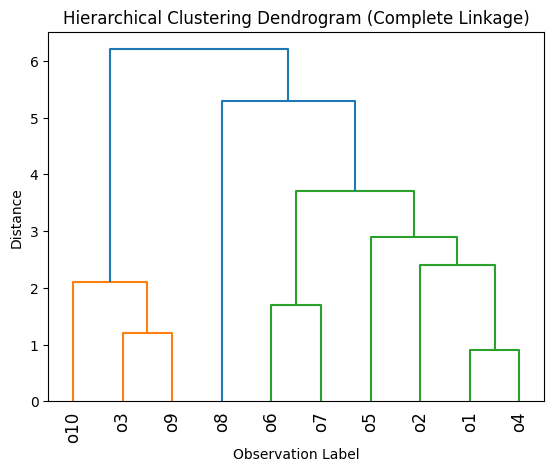

In [7]:
import numpy as np
from scipy.cluster.hierarchy import complete, dendrogram, average
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Define the distance matrix
distance_matrix = np.array([
    [0.0, 2.0, 5.7, 0.9, 2.9, 1.8, 2.7, 3.7, 5.3, 5.1],
    [2.0, 0.0, 5.6, 2.4, 2.5, 3.0, 3.5, 4.3, 6.0, 6.2],
    [5.7, 5.6, 0.0, 5.0, 5.1, 4.0, 3.3, 5.4, 1.2, 1.8],
    [0.9, 2.4, 5.0, 0.0, 2.7, 2.1, 2.2, 3.5, 4.6, 4.4],
    [2.9, 2.5, 5.1, 2.7, 0.0, 3.5, 3.7, 4.0, 5.8, 5.7],
    [1.8, 3.0, 4.0, 2.1, 3.5, 0.0, 1.7, 5.3, 3.8, 3.7],
    [2.7, 3.5, 3.3, 2.2, 3.7, 1.7, 0.0, 4.2, 3.1, 3.2],
    [3.7, 4.3, 5.4, 3.5, 4.0, 5.3, 4.2, 0.0, 5.5, 6.0],
    [5.3, 6.0, 1.2, 4.6, 5.8, 3.8, 3.1, 5.5, 0.0, 2.1],
    [5.1, 6.2, 1.8, 4.4, 5.7, 3.7, 3.2, 6.0, 2.1, 0.0]
])


# Condense the distance matrix to the format required by the complete (Maximum) linkage function
condensed_dist_matrix = squareform(distance_matrix, checks=False)

# Perform complete linkage hierarchical clustering
linked = complete(condensed_dist_matrix)

# Plot the dendrogram
dendrogram(linked,
           labels=['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10'],
           leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Observation Label')
plt.ylabel('Distance')
plt.show()


## Dendogram Cutoff - Jaccard Similarity

In [9]:
# Define a function to calculate the Jaccard similarity
def calculate_jaccard_similarity(ground_truth, predicted):
    N = len(ground_truth)
    true_positives = 0
    true_negatives = 0
    
    # Compare each pair of observations
    for i in range(N):
        for j in range(i + 1, N):
            if ground_truth[i] == ground_truth[j] and predicted[i] == predicted[j]:
                true_positives += 1
            elif ground_truth[i] != ground_truth[j] and predicted[i] != predicted[j]:
                true_negatives += 1

    # Calculate the Jaccard index
    jaccard_index = true_positives / (N * (N - 1) / 2 - true_negatives)
    return jaccard_index

# Ground truth clustering Z based on colors in Table 2
ground_truth = [0, 0, 1, 0, 0, 1, 0, 1]

# Predicted clustering Q based on dendrogram
predicted = [0, 1, 0, 0, 0, 1, 0, 1]

# Now we calculate the Jaccard similarity index
jaccard_similarity = calculate_jaccard_similarity(ground_truth, predicted)
print(f"Jaccard similarity: {jaccard_similarity:.3f}")

# Predicted clustering Q (based on the cutoff in the dendrogram)
# This needs to be determined from the dendrogram. 
# Cluster 1: would include the observations directly connected below the first intersected line, and so on for the other clusters.
# Cluster 2: would be determined by the next vertical line intersected by the cut-off.
# Cluster 3: would be the remaining observations connected below the last intersected line.
# Assuming we have the following clusters:
# Cluster 1: o1, o4
# Cluster 2: o2, o5, o6, o7, o10
# Cluster 3: o3, o8, o9


Jaccard similarity: 0.368


## Density of one observation (o_n) for K = xx

In [31]:
import numpy as np

# Define the distance matrix for the 11 observations (excluding distance to itself)
distances = np.array([
    [0.0, 53.8, 87.0, 67.4, 67.5, 71.2, 65.2, 117.9, 56.1, 90.3, 109.8],
    [53.8, 0.0, 69.9, 75.5, 62.9, 58.0, 63.0, 135.0, 84.1, 107.9, 131.5],
    [87.0, 69.9, 0.0, 49.7, 38.5, 19.3, 35.5, 91.8, 76.9, 78.7, 89.1],
    [67.4, 75.5, 49.7, 0.0, 24.2, 47.2, 47.0, 62.3, 33.4, 37.2, 60.0],
    [67.5, 62.9, 38.5, 24.2, 0.0, 37.7, 41.7, 79.5, 52.4, 60.2, 78.9],
    [71.2, 58.0, 19.3, 47.2, 37.7, 0.0, 21.5, 95.6, 68.3, 78.4, 91.0],
    [65.2, 63.0, 35.5, 47.0, 41.7, 21.5, 0.0, 96.0, 64.3, 75.5, 89.4],
    [117.9, 135.0, 91.8, 62.3, 79.5, 95.6, 96.0, 0.0, 66.9, 44.3, 24.2],
    [56.1, 84.1, 76.9, 33.4, 52.4, 68.3, 64.3, 66.9, 0.0, 39.2, 60.7],
    [90.3, 107.9, 78.7, 37.2, 60.2, 78.4, 75.5, 44.3, 39.2, 0.0, 39.4],
    [109.8, 131.5, 89.1, 60.0, 78.9, 91.0, 89.4, 24.2, 60.7, 39.4, 0.0]
])

# Function to calculate the density for a given observation index and K value
def calculate_density(distances, observation_index, K):
    # Exclude the distance to the observation itself and sort the distances
    sorted_distances = np.sort(distances[observation_index][np.arange(len(distances)) != observation_index])
    # Get the distances of the K-nearest neighbors
    knn_distances = sorted_distances[:K]
    # Calculate the density
    density = 1 / (K * knn_distances.sum())
    return density

# Calculate the density for observation o5 for K=3 nearest neighbors
density_o5 = calculate_density(distances, 4, 3)
density_o5


0.0033200531208499333

## Estimated density at observation O_xx for given lambda, M, sigma

In [4]:
import numpy as np
from scipy.stats import norm

# Define the distance matrix for the 11 observations from the Olive Oil dataset
distances = np.array([
    [0.0, 53.8, 87.0, 67.4, 67.5, 71.2, 65.2, 117.9, 56.1, 90.3, 109.8],
    [53.8, 0.0, 69.9, 75.5, 62.9, 58.0, 63.0, 135.0, 84.1, 107.9, 131.5],
    [87.0, 69.9, 0.0, 49.7, 38.5, 19.3, 35.5, 91.8, 76.9, 78.7, 89.1],
    [67.4, 75.5, 49.7, 0.0, 24.2, 47.2, 47.0, 62.3, 33.4, 37.2, 60.0],
    [67.5, 62.9, 38.5, 24.2, 0.0, 37.7, 41.7, 79.5, 52.4, 60.2, 78.9],
    [71.2, 58.0, 19.3, 47.2, 37.7, 0.0, 21.5, 95.6, 68.3, 78.4, 91.0],
    [65.2, 63.0, 35.5, 47.0, 41.7, 21.5, 0.0, 96.0, 64.3, 75.5, 89.4],
    [117.9, 135.0, 91.8, 62.3, 79.5, 95.6, 96.0, 0.0, 66.9, 44.3, 24.2],
    [56.1, 84.1, 76.9, 33.4, 52.4, 68.3, 64.3, 66.9, 0.0, 39.2, 60.7],
    [90.3, 107.9, 78.7, 37.2, 60.2, 78.4, 75.5, 44.3, 39.2, 0.0, 39.4],
    [109.8, 131.5, 89.1, 60.0, 78.9, 91.0, 89.4, 24.2, 60.7, 39.4, 0.0]
])

# Observation index for o11 is 10 (since indexing starts at 0)
observation_index = 10
# Exclude o11 from its neighbors and sort the remaining distances
neighbors = np.delete(distances[observation_index], observation_index)
sorted_neighbors = np.sort(neighbors)

# Use the closest two observations for kernel density estimation
closest_distances = sorted_neighbors[:2]

# Set the kernel width (sigma)
sigma = 20

# Calculate the kernel density estimation for o11
# # We use the normal distribution density function as the kernel
# density_estimation = np.sum(norm.pdf(closest_distances, scale=sigma)) / (2 * sigma * np.sqrt(2 * np.pi))

# density_estimation

# Number of dimensions (M)
M = 8

# Calculate the kernel density estimation for o11
p_lambda_o11 = (1 / 2) * np.sum((1 / (np.sqrt(2 * np.pi * sigma**2)**M)) *
                                 np.exp(-0.5 * ((closest_distances / sigma)**2)))

print("Estimated density at o11:", p_lambda_o11)



Estimated density at o11: 7.826826302434703e-15


In [2]:
# Calculate the given expression in Python
import numpy as np

# Given values
coefficient = 1/2
base = np.sqrt((2 * np.pi * 20**2)**8)
value = 0.6246

# Calculate the expression
result = coefficient * (1 / base) * value
result


7.827310200532026e-15

In [8]:
import numpy as np

# # Define the binarized data for each class
# data = np.array([
#     [0, 0, 0, 1, 0, 0, 0, 1],  # o1
#     [0, 0, 1, 0, 0, 1, 0, 1],  # o2
#     [0, 0, 1, 0, 0, 1, 0, 1],  # o3
#     [0, 1, 0, 0, 0, 1, 0, 1],  # o4
#     [0, 0, 0, 0, 0, 1, 0, 1],  # o5
#     [0, 0, 1, 0, 1, 1, 0, 1],  # o6
#     [0, 0, 1, 0, 0, 1, 0, 1],  # o7
#     [1, 1, 0, 0, 0, 0, 1, 1],  # o8
#     [0, 1, 0, 0, 0, 0, 0, 1],  # o9
#     [0, 1, 0, 0, 0, 1, 0, 1],  # o10
#     [1, 1, 0, 0, 0, 0, 0, 0]   # o11
# ])

# Given data for feature f1 and f6 for each class
data_c1 = [(0, 1), (0, 1)]  # Assuming these are the (f1, f6) pairs for class C1
data_c2 = [(0, 1)] * 5      # Assuming all 5 samples in C2 have (f1 = 0, f6 = 1)
data_c3 = [(0, 0), (0, 0), (0, 1), (0, 0)]  # Assuming these are the (f1, f6) pairs for class C3

# Calculate the prior probabilities for each class
p_c1 = len(data_c1) / 11
p_c2 = len(data_c2) / 11
p_c3 = len(data_c3) / 11

# Calculate the probability of f1 = 0 and f6 = 1 for each class
p_f1_0_f6_1_c1 = data_c1.count((0, 1)) / len(data_c1)
p_f1_0_f6_1_c2 = data_c2.count((0, 1)) / len(data_c2)
p_f1_0_f6_1_c3 = data_c3.count((0, 1)) / len(data_c3)

# Apply Bayes' theorem
numerator = p_f1_0_f6_1_c2 * p_c2
denominator = (
    p_f1_0_f6_1_c1 * p_c1 +
    p_f1_0_f6_1_c2 * p_c2 +
    p_f1_0_f6_1_c3 * p_c3
)

# Calculate the conditional probability
p_c2_given_f1_0_f6_1 = numerator / denominator

print(f"P(C2 | f1 = 0, f6 = 1) = {p_c2_given_f1_0_f6_1}")


P(C2 | f1 = 0, f6 = 1) = 0.625


## Jaccard similarity, cosine similarity and SMC (Simple Matching Coefficient) from Binary classification

In [10]:
from scipy.spatial.distance import cosine, jaccard

# Binary vectors for each observation
o1 = [0, 0, 0, 1, 0, 0, 0, 1]
o2 = [0, 0, 1, 0, 0, 1, 0, 1]
o3 = [0, 0, 1, 0, 0, 1, 0, 1]
o4 = [0, 1, 0, 0, 0, 1, 0, 1]
# o1 to o4 taken as per problem, see what you problem asks for

# Compute SMC
def smc(a, b):
    return sum(1 for x, y in zip(a, b) if x == y) / len(a)

# Compute Cosine Similarity
def cos_sim(a, b):
    return 1 - cosine(a, b)

# Compute Jaccard Index
def jaccard_index(a, b):
    return 1 - jaccard(a, b)

# Calculate similarities
smc_o2_o4 = smc(o2, o4)
cos_o1_o2 = cos_sim(o1, o2)
smc_o3_o4 = smc(o3, o4)
j_o2_o4 = jaccard_index(o2, o4)

print(f"SMC(o2, o4): {smc_o2_o4:.3f}")
print(f"Cos(o1, o2): {cos_o1_o2:.3f}")
print(f"SMC(o3, o4): {smc_o3_o4:.3f}")
print(f"J(o2, o4): {j_o2_o4:.3f}")


SMC(o2, o4): 0.750
Cos(o1, o2): 0.408
SMC(o3, o4): 0.750
J(o2, o4): 0.500


## Impurity Gain calculation based on a split
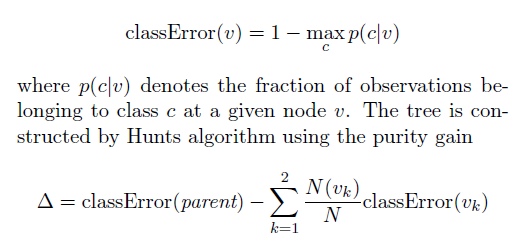

In [15]:
import numpy as np

# Data in binary matrix form where each row is an observation and each column is a feature
data = np.array([
    [0, 0, 0, 1, 0, 0, 0, 1],  # o1
    [0, 0, 1, 0, 0, 1, 0, 1],  # o2
    [0, 0, 1, 0, 0, 1, 0, 1],  # o3
    [0, 1, 0, 0, 0, 1, 0, 1],  # o4
    [0, 0, 0, 0, 0, 1, 0, 1],  # o5
    [0, 0, 1, 0, 1, 1, 0, 1],  # o6
    [0, 0, 1, 0, 0, 1, 0, 1],  # o7
    [1, 1, 0, 0, 0, 0, 1, 1],  # o8
    [0, 1, 0, 0, 0, 0, 0, 1],  # o9
    [0, 1, 0, 0, 0, 1, 0, 1],  # o10
    [1, 1, 0, 0, 0, 0, 0, 0]   # o11
])

# Class labels for the observations
classes = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2])  # 0 for C1, 1 for C2, 2 for C3

# Function to calculate Gini impurity
def gini_impurity(class_labels):
    unique, counts = np.unique(class_labels, return_counts=True)
    probabilities = counts / counts.sum()
    impurity = 1 - np.sum(probabilities**2)
    return impurity

# Calculate Gini impurity for the root node
root_impurity = gini_impurity(classes)

# Calculate Gini impurities for the branches after the split on f2
left_branch_classes = classes[data[:, 1] == 0]  # f2 = 0
right_branch_classes = classes[data[:, 1] == 1]  # f2 = 1

left_impurity = gini_impurity(left_branch_classes)
right_impurity = gini_impurity(right_branch_classes)

# Calculate the weighted average Gini impurity after the split
weighted_impurity = (len(left_branch_classes) / len(classes) * left_impurity +
                     len(right_branch_classes) / len(classes) * right_impurity)

# Calculate the impurity gain from the split
impurity_gain = root_impurity - weighted_impurity

# Print the impurity gain
print(f"The impurity gain of the split based on f2 is: {impurity_gain:.4f}")

# # Verify the impurity gain against the options provided
# options = {
#     'A': 136 / 1815,
#     'B': 436 / 1815,
#     'C': 3 / 11,
#     'D': 1379 / 1815,
# }

# # Find which option is correct
# for option, value in options.items():
#     if np.isclose(impurity_gain, value):
#         print(f"Option {option} is correct with an impurity gain of {value:.4f}")
#         break


The impurity gain of the split based on f2 is: 0.2402


## Confidence of a rule
- Find the support of the antecedent ({f6, f8}): This is the number of transactions in which both f6 and f8 appear together.
- Find the support of the entire rule ({f6, f8} and {f3, f5}): This is the number of transactions in which f6, f8, f3, and f5 all appear together.
- Calculate the confidence of the rule: This is done by dividing the support of the entire rule by the support of the antecedent.

In [16]:
# Data from the user
transactions = [
    [0, 0, 0, 1, 0, 0, 0, 1], # o1
    [0, 0, 1, 0, 0, 1, 0, 1], # o2
    [0, 0, 1, 0, 0, 1, 0, 1], # o3
    [0, 1, 0, 0, 0, 1, 0, 1], # o4
    [0, 0, 0, 0, 0, 1, 0, 1], # o5
    [0, 0, 1, 0, 1, 1, 0, 1], # o6
    [0, 0, 1, 0, 0, 1, 0, 1], # o7
    [1, 1, 0, 0, 0, 0, 1, 1], # o8
    [0, 1, 0, 0, 0, 0, 0, 1], # o9
    [0, 1, 0, 0, 0, 1, 0, 1], # o10
    [1, 1, 0, 0, 0, 0, 0, 0]  # o11
]

# Count the support for the antecedent (f6 and f8)
support_antecedent = sum(1 for transaction in transactions if transaction[5] == 1 and transaction[7] == 1)

# Count the support for the entire rule (f6, f8, f3, and f5)
support_whole_rule = sum(1 for transaction in transactions if transaction[2] == 1 and transaction[4] == 1 and transaction[5] == 1 and transaction[7] == 1)

# Calculating the confidence
confidence = support_whole_rule / support_antecedent if support_antecedent != 0 else 0
support_antecedent, support_whole_rule, confidence


(7, 1, 0.14285714285714285)

## Apriori Algorithm

To determine the content of L3 when using the Apriori algorithm, we need to follow these steps:

- Calculate the support of all individual items (1-itemsets) and find those with support greater than ϵ=0.3
- Generate 2-itemsets (L2) from the frequent 1-itemsets and calculate their support. Keep only those with support greater than ϵ.
- Generate 3-itemsets (L3) from the frequent 2-itemsets and calculate their support. Again, keep only those with support greater than ϵ.

In [19]:
import itertools

# Data from the user
transactions = [
    [0, 0, 0, 1, 0, 0, 0, 1], # o1
    [0, 0, 1, 0, 0, 1, 0, 1], # o2
    [0, 0, 1, 0, 0, 1, 0, 1], # o3
    [0, 1, 0, 0, 0, 1, 0, 1], # o4
    [0, 0, 0, 0, 0, 1, 0, 1], # o5
    [0, 0, 1, 0, 1, 1, 0, 1], # o6
    [0, 0, 1, 0, 0, 1, 0, 1], # o7
    [1, 1, 0, 0, 0, 0, 1, 1], # o8
    [0, 1, 0, 0, 0, 0, 0, 1], # o9
    [0, 1, 0, 0, 0, 1, 0, 1], # o10
    [1, 1, 0, 0, 0, 0, 0, 0]  # o11
]

# Calculate the support of each item
def calculate_support(transactions, itemset):
    return sum(1 for transaction in transactions if all(transaction[item] == 1 for item in itemset))

# Generate itemsets of a given length
def generate_itemsets(previous_level, length):
    return list(itertools.combinations(set(itertools.chain.from_iterable(previous_level)), length))

# Support threshold
epsilon = 0.3
n_transactions = len(transactions)

# Step 1: Find all frequent 1-itemsets (L1)
L1 = []
for item in range(len(transactions[0])):
    if calculate_support(transactions, [item]) / n_transactions >= epsilon:
        L1.append((item,))

# Step 2: Find all frequent 2-itemsets (L2) from L1
L2 = []
for itemset in generate_itemsets(L1, 2):
    if calculate_support(transactions, itemset) / n_transactions >= epsilon:
        L2.append(itemset)

# Step 3: Find all frequent 3-itemsets (L3) from L2
L3 = []
for itemset in generate_itemsets(L2, 3):
    if calculate_support(transactions, itemset) / n_transactions >= epsilon:
        L3.append(itemset)

L1, L2, L3

#Answer is indexed, so add +1 to get actual itemset number (2,5,7 = f3, f6, f8 in answer)


([(1,), (2,), (5,), (7,)], [(1, 7), (2, 5), (2, 7), (5, 7)], [(2, 5, 7)])

## Q15: Probablity of a particular class using Naive-Bayes Classifier


In [21]:
import numpy as np
from scipy.stats import norm

# Provided data
data = np.array([
    [38.0, 15.1], # o1 - C1
    [26.8, 12.8], # o2 - C1
    [64.5, 39.6], # o3 - C2
    [63.2, 45.7], # o4 - C2
    [66.3, 34.3], # o5 - C2
    [56.7, 34.7], # o6 - C2
    [63.4, 30.6], # o7 - C2
    [87.1, 85.3], # o8 - C3
    [51.3, 46.8], # o9 - C3
    [67.5, 62.3], # o10 - C3
    [86.0, 71.3]  # o11 - C3
])

# Class labels
classes = ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3']

# Mean of each feature for each class
means = {
    'C1': np.mean(data[:2], axis=0),
    'C2': np.mean(data[2:7], axis=0),
    'C3': np.mean(data[7:], axis=0)
}

# Variance (given as 400)
variance = 400

# Test sample values
x1_test, x2_test = 32.0, 14.0

# Prior probabilities (based on class frequencies)
priors = {
    'C1': classes.count('C1') / len(classes),
    'C2': classes.count('C2') / len(classes),
    'C3': classes.count('C3') / len(classes)
}

# Denominator (given)
p_x1_x2 = 0.00010141

# Denominator (not given)

# Calculate the denominator for the Bayes formula
# denominator = sum(numerators[class_label] for class_label in numerators)

# # Recalculate the posterior probability for North Apulia (C1) without the provided denominator
# p_C1_given_x1_x2_no_given_denominator = numerators['C1'] / denominator
# p_C1_given_x1_x2_no_given_denominator_percentage = p_C1_given_x1_x2_no_given_denominator * 100

# denominator, p_C1_given_x1_x2_no_given_denominator_percentage


# Calculate the numerator of the Bayes formula for each class
numerators = {}
for class_label in ['C1', 'C2', 'C3']:
    mu_x1, mu_x2 = means[class_label]
    p_x1_given_C = norm.pdf(x1_test, mu_x1, np.sqrt(variance))
    p_x2_given_C = norm.pdf(x2_test, mu_x2, np.sqrt(variance))
    numerators[class_label] = p_x1_given_C * p_x2_given_C * priors[class_label]

# Calculate the posterior probability for North Apulia (C1)
p_C1_given_x1_x2 = numerators['C1'] / p_x1_x2
p_C1_given_x1_x2_percentage = p_C1_given_x1_x2 * 100

numerators, p_C1_given_x1_x2, p_C1_given_x1_x2_percentage


({'C1': 7.232846273963879e-05,
  'C2': 2.8510447073322624e-05,
  'C3': 5.714398619423344e-07},
 0.7132281110308528,
 71.32281110308529)

## Total number of paramters needed to fit the Neural Network - hidden layer - weights
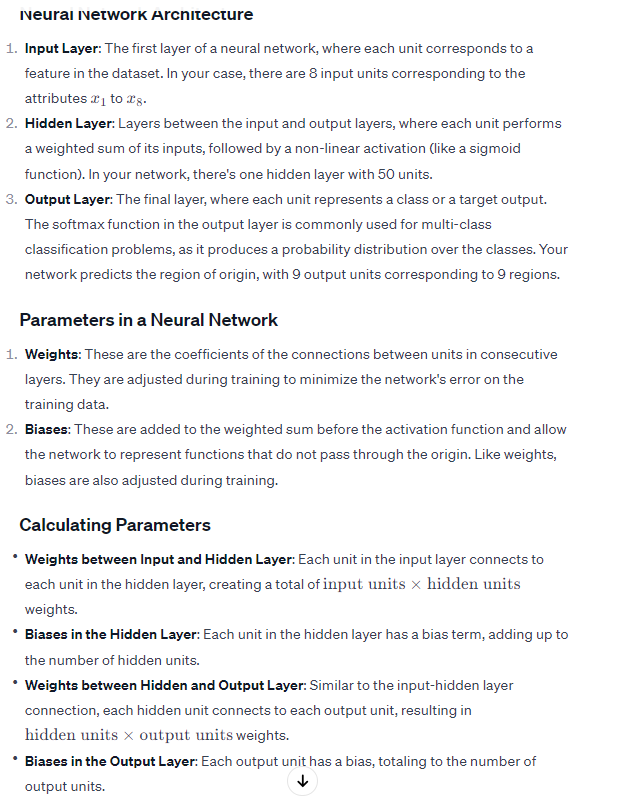
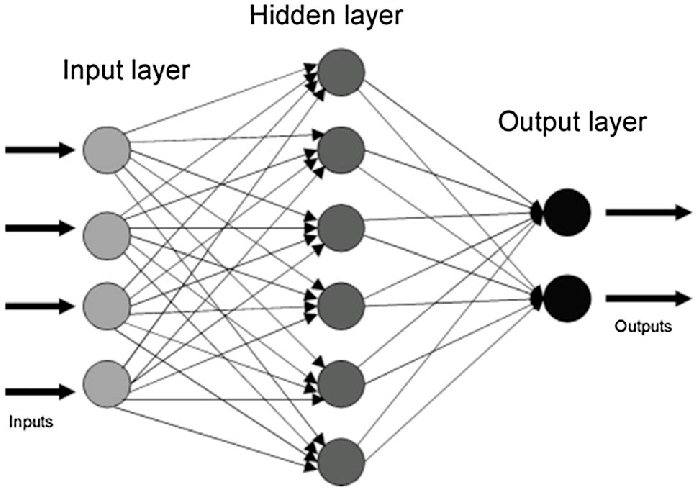
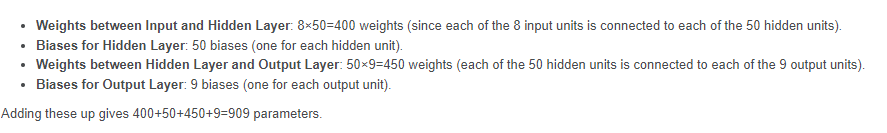

In [2]:
# Updated values
M = 8  # Number of features
nh = 50  # Number of hidden units
C = 9  # Number of classes

# Calculating parameters
hidden_layer_params = (M + 1) * nh  # (Features + bias) for each hidden unit
output_layer_params = (nh + 1) * C  # (Hidden units + bias) for each output class

# Total number of parameters
total_params = hidden_layer_params + output_layer_params
total_params

#Alternate method

# Given values
# input_units = 8  # Attributes x1 to x8
# hidden_units = 50  # nh = 50 units in the hidden layer
# output_units = 9  # Number of regions (classes)

# # Calculating the number of parameters
# # Weights between input layer and hidden layer
# weights_input_hidden = input_units * hidden_units

# # Biases for hidden layer
# biases_hidden = hidden_units

# # Weights between hidden layer and output layer
# weights_hidden_output = hidden_units * output_units

# # Biases for output layer
# biases_output = output_units

# # Total number of parameters
# total_parameters = weights_input_hidden + biases_hidden + weights_hidden_output + biases_output
# total_parameters



909

## Weight (w*) calculation - that minimizes the mean squared error 

In [1]:
import numpy as np

# Activation function (ReLU)
def relu(x):
    return np.maximum(0, x)

# Network function
def network_function(x, w1, w2):
    x_tilde = np.insert(x, 0, 1)  # Add bias term
    z1 = relu(np.dot(w1, x_tilde))
    z1_tilde = np.array([1, z1])  # Add bias term
    return np.dot(w2, z1_tilde)

# Given data
X = np.array([[0, 0], [1, 0], [1, 1], [1, 2]])
y = np.array([1, 3, 5, 7])
w1 = np.array([-2, 4, 2])  # Fixed weights for the first layer

# Possible w2 options
w2_options = {
    'A': np.array([1, 1]),
    'B': np.array([1, 2]),
    'C': np.array([1, 3]),
    'D': np.array([1, 4])
}

# Calculate MSE for each w2 option
mse_results = {}
for option, w2 in w2_options.items():
    predictions = np.array([network_function(x, w1, w2) for x in X])
    mse = np.mean((predictions - y) ** 2)
    mse_results[option] = mse

mse_results

#MSE=0 is correct answer

{'A': 0.0, 'B': 14.0, 'C': 56.0, 'D': 126.0}

## ADA boost - weight of correct observation after 1st round

In [4]:
import numpy as np
import math

# Given values
N = 572  # Total number of observations
accuracy = 3 / 4  # Accuracy of the model
error_rate = 1 - accuracy  # Error rate of the model

# Calculate the performance weight (alpha)
alpha = 0.5 * math.log((1 - error_rate) / error_rate)

# Initial weight for each observation
initial_weight = 1 / N

# Update the weight for a correctly classified observation
updated_weight_correct = initial_weight * math.exp(-alpha)

# Normalization factor
normalization_factor = (accuracy * math.exp(-alpha)) + ((1 - accuracy) * math.exp(alpha))

# Normalized updated weight
normalized_updated_weight_correct = updated_weight_correct / normalization_factor

normalized_updated_weight_correct


0.0011655011655011655

In [2]:
import numpy as np

# Example data
N_example = 4  # Number of observations
initial_weights_example = np.full(N_example, 1/N_example)  # Equal initial weights
classifier_accuracy_example = 0.75  # Example classifier accuracy
error_rate_example = 1 - classifier_accuracy_example  # Error rate of the classifier

# Calculate the performance weight (alpha)
alpha_example = 0.5 * np.log((1 - error_rate_example) / error_rate_example)

# Update weights for correctly and incorrectly classified observations
# Assuming two observations are correctly classified and two are not
updated_weights_example = np.where(
    [True, True, False, False],  # Correctly classified
    initial_weights_example * np.exp(-alpha_example),  # Correctly classified update
    initial_weights_example * np.exp(alpha_example)   # Incorrectly classified update
)

# Normalize the weights
normalized_weights_example = updated_weights_example / np.sum(updated_weights_example)
normalized_weights_example


array([0.125, 0.125, 0.375, 0.375])

## ADA Pseudo codes

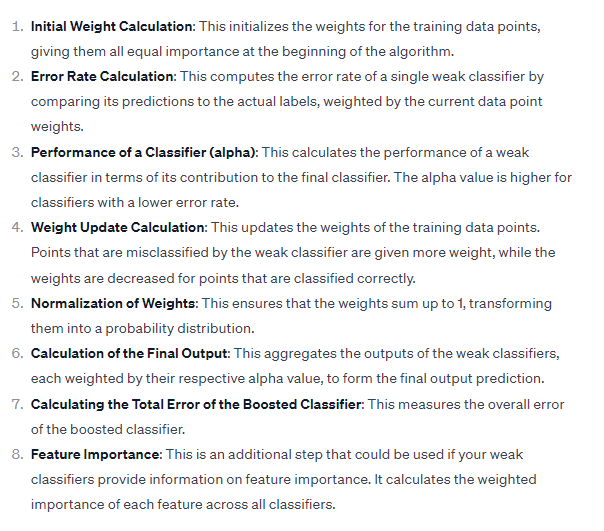
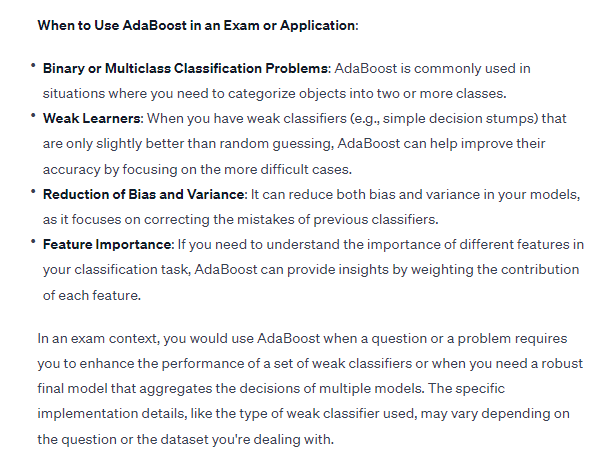

In [4]:
import math

# Pseudo code for AdaBoost in Python

# 1. Initial Weight Calculation
def initialize_weights(N):
    # N: Number of data points
    initial_weights = [1/N for _ in range(N)]
    return initial_weights

# 2. Error Rate Calculation
def calculate_error_rate(weights, predictions, actuals):
    # weights: array of weights for each data point
    # predictions: array of predictions from the classifier
    # actuals: array of actual labels
    misclassified_weight = sum(weight for weight, prediction, actual in zip(weights, predictions, actuals) if prediction != actual)
    total_weight = sum(weights)
    error_rate = misclassified_weight / total_weight
    return error_rate

# 3. Performance of a Classifier (alpha)
def calculate_alpha(error_rate):
    if error_rate == 0:
        alpha = float('inf')  # To handle division by zero
    else:
        alpha = 0.5 * math.log((1 - error_rate) / error_rate)
    return alpha

# 4. Weight Update Calculation
def update_weights(weights, predictions, actuals, alpha):
    new_weights = [w * math.exp(-alpha) if prediction == actual else w * math.exp(alpha)
                   for w, prediction, actual in zip(weights, predictions, actuals)]
    return new_weights

# 5. Normalization of Weights
def normalize_weights(weights):
    total = sum(weights)
    normalized_weights = [w/total for w in weights]
    return normalized_weights

# 6. Calculation of the Final Output
def calculate_final_output(alphas, weak_classifiers_outputs):
    final_output = sum(alpha * output for alpha, output in zip(alphas, weak_classifiers_outputs))
    return final_output

# 7. Calculating the Total Error of the Boosted Classifier
def calculate_total_error(final_output, actuals):
    errors = sum(1 for output, actual in zip(final_output, actuals) if output != actual)
    total_error = errors / len(actuals)
    return total_error

# 8. Feature Importance (Example, specifics depend on weak classifiers)
def calculate_feature_importance(alphas, feature_importances_in_classifiers):
    total_feature_importance = [0] * num_features  # Assuming num_features is known
    for alpha, importances in zip(alphas, feature_importances_in_classifiers):
        for i, importance in enumerate(importances):
            total_feature_importance[i] += alpha * importance
    return total_feature_importance



In [6]:
# Example Dataset
X = [[0, 0], [1, 0], [0, 1], [1, 1]]  # Features
y = [0, 1, 1, 0]  # Labels
N = len(X)  # Number of observations

# Example Weak Classifier (Simple Decision Stump)
def weak_classifier(observation):
    # Classify based on first feature
    return 1 if observation[0] > 0 else 0

# Example: Initialize weights
weights = initialize_weights(N)

# Example: Calculate predictions and error rate
predictions = [weak_classifier(x) for x in X]
error_rate = calculate_error_rate(weights, predictions, y)

# Example: Calculate alpha
alpha = calculate_alpha(error_rate)

# Example: Update and normalize weights
weights = update_weights(weights, predictions, y, alpha)
weights = normalize_weights(weights)

# Example: Calculate final output (assuming only one weak classifier for simplicity)
# Here, the final_output is simply the predictions weighted by alpha, for demonstration purposes
final_output = [alpha * pred for pred in predictions]

# Example: Calculate total error
# Since final_output is not a single value, we modify the total_error calculation to handle multiple predictions
total_error = sum(1 for output, actual in zip(final_output, y) if (output >= 0.5) != actual) / N

# Example output
print("Initial Weights:", weights)
print("Error Rate:", error_rate)
print("Alpha:", alpha)
print("Updated Weights:", weights)
print("Final Output:", final_output)
print("Total Error:", total_error)


Initial Weights: [0.25, 0.25, 0.25, 0.25]
Error Rate: 0.5
Alpha: 0.0
Updated Weights: [0.25, 0.25, 0.25, 0.25]
Final Output: [0.0, 0.0, 0.0, 0.0]
Total Error: 0.5


## Farthest centroid - K means

In [1]:
# Given dataset and first centroid
x = [0.4, 1.7, 3.7, 4.6]
first_centroid = 1.7

# Function to find the farthest point from a list of centroids
def find_farthest_point(data, centroids):
    farthest_point = None
    max_distance = -1
    for point in data:
        # Calculate the minimum distance from the point to any of the centroids
        distance = min(abs(point - centroid) for centroid in centroids)
        if distance > max_distance:
            max_distance = distance
            farthest_point = point
    return farthest_point

# Finding the second centroid
second_centroid = find_farthest_point(x, [first_centroid])

# Finding the third centroid
third_centroid = find_farthest_point(x, [first_centroid, second_centroid])

second_centroid, third_centroid



(4.6, 0.4)

## Q21: Linear Regression - weights w1 w2

In [2]:
import numpy as np

# Given dataset
X = np.array([1, 2, 3, 4])
y = np.array([6, 2, 3, 4])

# Transform the features
transformed_X = np.column_stack((np.cos(np.pi/2 * X), np.sin(np.pi/2 * X)))

# Solve for the weights using linear regression
# weights = (X^T X)^-1 X^T y
weights = np.linalg.inv(transformed_X.T @ transformed_X) @ transformed_X.T @ y

# Extracting w2
w1, w2 = weights
w1, w2


(1.0, 1.4999999999999998)

## Calculation of lambda - Ridge Regression method

In [11]:
# Given dataset
X = np.array([1, 2, 3, 4])
y = np.array([6, 2, 3, 4])

# Standardize X
X_mean = np.mean(X)
X_std = np.std(X)
X_standardized = (X - X_mean) / X_std

# Given optimal weight and constant term
w = -np.sqrt(3/20)
w0 = 15/4
E_lambda = 8  # Given cost function value

# Recalculate predictions with standardized X
predictions_standardized = w0 + X_standardized * w

# Recalculate the sum of squared residuals
residuals_squared_standardized = np.sum((y - predictions_standardized) ** 2)

# Recalculate lambda with standardized X
lambda_value_standardized = (E_lambda - residuals_squared_standardized) / (w ** 2)
lambda_value_standardized


2.5470053837925137

## N_forward - N_backward

In [2]:
# Given values
K = 5  # Number of models for each selection in cross-validation
M = 8  # Total number of attributes

# Calculate Nforward
Nforward = K * (1 + sum(M - i for i in range(1, 7)))

# Calculate Nbackward
Nbackward = K * (1 + sum(M - i for i in range(1, 3)))

# Difference between the number of models trained
difference = Nforward - Nbackward
Nforward, Nbackward, difference


(140, 70, 70)

## Estimating generalization error of a regression model

In [13]:
# Given data
losses = [1, 3, 3, 1, 2, 3, 1]
n = 7  # Number of observations

# Degrees of freedom (nu)
nu = n - 1

# Empirical Mean (mu)
mu = sum(losses) / n

# Calculate the empirical variance of the mean
variance_mean = sum((z - mu)**2 for z in losses) / (n * (n - 1))

# Empirical Standard Deviation of the Mean (sigma)
sigma = np.sqrt(variance_mean)

nu, mu, sigma


(6, 2.0, 0.3779644730092272)

## Maximum number of folds - Q25

In [15]:
import numpy as np

# Time for Hold-Out Method (Outer Loop)
no = 800
mo = 200
t_o = no * np.log2(no) + mo

# Find the maximum K within the computational budget
computational_budget = 200000
max_K = 1
while (t_o + compute_inner_time(max_K)) <= computational_budget:
    max_K += 1

# Function to calculate time for K-Fold Cross-Validation (Inner Loop)
def compute_inner_time(K, L=3):
    # Handling the case where K = 1 to avoid divide by zero
    if K == 1:
        ni = 800  # All training observations are used
        mi = 0    # No testing observations in this case
    else:
        ni = 800 * (K - 1) / K
        mi = 800 / K
    return L * K * (ni * np.log2(ni) + mi)

# Find the maximum K within the computational budget
max_K = 1
while max_K <= 10:  # Limiting K to a maximum of 10 for practicality
    if (t_o + compute_inner_time(max_K)) > computational_budget:
        break
    max_K += 1

max_K - 1  # Adjusting to get the correct max_K within the budget


9